# Deep Learning 
## Assignment 1: Neural Network

<H3> Submitted by: <br>
Name: <I>Vikrant Singh Jamwal</I> <br>
Student ID: <I>23104534</I></H3>

## Libraries Used

In [1]:
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Part 1: Implement Logistic Regression

**Algorithm:**  Logistic Regression, unlike its name is a classification algorithm. It divides the dataset by creating a line or plane between binary classes through points. Regression term is used as it gives out the probabilies as output.

**Equation of the Line**

$ z(x) = \sum_{i=1}^n W_i.X_i + b$

where, z(x) is the output, W are the weights (slope of the line), X are the inputs and b is the bias (intercept of the line).

**Activation Function**

From various activation functions like Sigmoid, ReLu, tanH, Leaky Relu and step function (We avoid using as it is non differentiable), we have used Sigmoid function in this Assignment.

Sigmoid $ f(z) = \frac{1}{1 + e^{-z}} $ 

where, f(z) is the activation output after passing above calculated z through the activation function.

**Steps taken to create a Neural Network**

* First we created all the functions required to train and predict the output. Functions included:
    * **sigmoid()**: This function is our activation function.
    * **forward_prop():** This function is for forward propogation, where we put inputs in the equation resembling a line and gets the output.
    * **back_prop():** This function is for backward propogation, where the weights and bias are updated on the basis of the outputs generated and true outputs.
    * **loss_func():** This function is used to calculate the loss for the output layer.
    * **train():** This includes initialisation of weights and bias, then a random instance is chosen to train. Hyperparameters like threshold, learning rate (alpha) and max_iterations are defined.
    * **predict():** This function predicts the output, it includes calling forward_prop function and then estimating the classes from the probability.
    
* NumPy is not used in the implementation of Neural network without hidden layers.
* Hill climb approach is used to take the steps to minimise the cost function.

**References**
* Deep leaning Module - 1MAI - Semester 2
* Optimisation Module - 1MAI - Semester 1
* http://ufldl.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/ (Provided in the DL module)

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def forward_prop(x, W, b):
    a=[]
    for i in range(len(x)):
        Z = b + sum([x[i][j]*W[j] for j in range(len(x[0]))])
        a.append(sigmoid(Z))
    return a

In [4]:
def back_prop(x, Y, W, b, y_hat, alpha):   
    dW = [0]*len(x[0])
    db = 0
    for i in range(len(x)):
        dZ = y_hat[i] - Y[i]
        for j in range(len(x[0])):
            dW[j] += dZ * x[i][j]
    db = dZ   
    return [dw/len(x) for dw in dW], db/len(x)

In [5]:
def loss_func(x, Y, a):    
    
    loss = 0
    for i in range(len(x)):
        loss +=(Y[i]*math.log(a[i])+(1-Y[i])*math.log(1-a[i]))
    return -loss

In [6]:
def train(X, Y, alpha = 0.01, max_iterations = 50000, threshold = 1e-7):
    
    W = [random.random()*0.01]*len(X[0])
    b = np.random.randn(1, 1)*0.01
    
    losses=[]
    J = 100
    J_previous = 100
    iterations = 0
    
    stop=False
    while stop == False:
        
        index = np.random.choice(len(X))
        x = [X[index]]
        y = [Y[index]]

        y_hat = forward_prop(x, W, b)
        
        J = loss_func(x, y, y_hat)
        
        dW, db = back_prop(x, y, W, b, y_hat, alpha)
        
        for j in range(len(x[0])):
            W[j] -= alpha * dW[j]
        b -= alpha * db
            
        
        iterations += 1
        if abs(J - J_previous) < threshold:
            stop = True
            
        elif iterations==max_iterations:
            stop = True
    
        if abs(J) < abs(J_previous):
            losses.append(J)
            J_previous = J
        else:
            losses.append(J_previous)

        
    return losses, J, W, b, iterations

In [7]:
def predict(x, W, b):
    return [1 if y>0.5 else 0 for y in forward_prop(x, W, b)]

Function train() returns 5 values:
* losses: list of J for each iteration
* J: last loss value
* W: updated weights
* b: updated bias
* iterations: Number of iterations to converge or reach max. limit.

# Part 2: Easy Tasks

## Reading the datasets (blobs400 and circles500)

Used Pandas Dataframes to read and visualise the dataset

In [8]:
df_blobs = pd.read_csv("blobs400.csv")
df_circles = pd.read_csv("circles500.csv")
df_blobs.head()

,X1,X2,X3,Class
0,1.418221,2.124375,-0.433905,1
1,1.590404,0.935434,1.510369,1
2,2.311458,-1.026668,1.031930,1
3,1.186782,0.591894,0.563649,1
4,1.661888,4.047231,0.987049,0


Creating X and y for both the datasets

In [9]:
x_blobs = np.array(df_blobs.drop("Class", axis = 1))
Y_blobs = [i for i in df_blobs["Class"]]

In [10]:
x_circles = np.array(df_circles.drop("Class", axis=1))
Y_circles = [i for i in df_circles["Class"]]

### Using train_test_split to divide the dataset in train, val and test dataset

* First dividing the dataset in training and test data, with test size = 0.15
* Then, dividng training into train and val data, with test size = 0.176 as to get the train set as 70%, val set as 15% and test set as 15%.

In [11]:
x_training_blobs, x_test_blobs, Y_training_blobs, Y_test_blobs = train_test_split(x_blobs, Y_blobs, test_size=0.15, random_state = 42)
x_train_blobs, x_val_blobs, Y_train_blobs, Y_val_blobs = train_test_split(x_training_blobs, Y_training_blobs, test_size=0.176, random_state = 42)


x_training_circles, x_test_circles, Y_training_circles, Y_test_circles = train_test_split(x_circles, Y_circles,test_size=0.15, random_state = 42)
x_train_circles, x_val_circles, Y_train_circles, Y_val_circles = train_test_split(x_training_circles, Y_training_circles,test_size=0.176, random_state = 42)

In [12]:
len(Y_train_blobs)

280

## Training and plotting both the datasets

In [13]:
losses_blobs, J_blobs, W_blobs_hat, b_blobs_hat, i_b = train(x_train_blobs, Y_train_blobs)
losses_circles, J_circles, W_circles_hat, b_circles_hat, i_c = train(x_train_circles, Y_train_circles)

### BLOBS

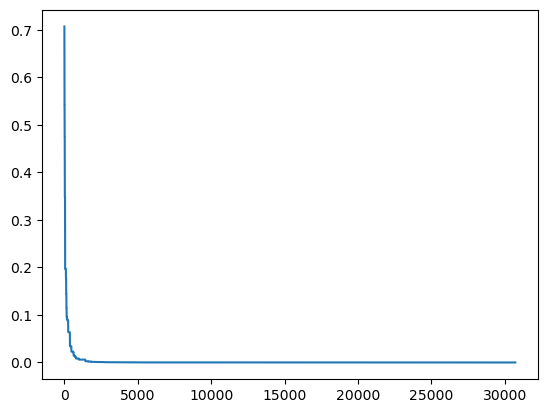

In [14]:
plt.plot(range(i_b), losses_blobs)

### CIRCLES

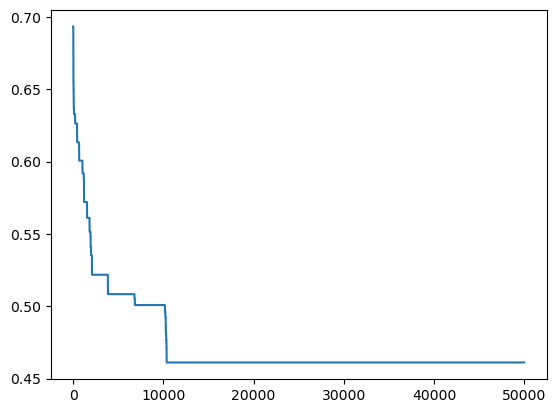

In [15]:
plt.plot(range(i_c), losses_circles)

## Evaluating the predictions on val and test set

#### Blobs

In [16]:
y_hat_blobs = predict(x_train_blobs, W_blobs_hat, b_blobs_hat)
print(f'Training Accuracy: {accuracy_score(Y_train_blobs, y_hat_blobs)*100:.2f}%')

y_hat_blobs = predict(x_val_blobs, W_blobs_hat, b_blobs_hat)
print(f'Validation Accuracy: {accuracy_score(Y_val_blobs, y_hat_blobs)*100:.2f}%')

y_hat_blobs = predict(x_test_blobs, W_blobs_hat, b_blobs_hat)
print(f'Testing Accuracy: {accuracy_score(Y_test_blobs, y_hat_blobs)*100:.2f}%')

Training Accuracy: 97.50%
Validation Accuracy: 98.33%
Testing Accuracy: 96.67%


#### Circles

In [17]:
y_hat_circles = predict(x_train_circles, W_circles_hat, b_circles_hat)
print(f'Training Accuracy: {accuracy_score(Y_train_circles, y_hat_circles)*100:.2f}%')

y_hat_circles = predict(x_val_circles, W_circles_hat, b_circles_hat)
print(f'Validation Accuracy: {accuracy_score(Y_val_circles, y_hat_circles)*100:.2f}%')

y_hat_circles = predict(x_test_circles, W_circles_hat, b_circles_hat)
print(f'Testing Accuracy: {accuracy_score(Y_test_circles, y_hat_circles)*100:.2f}%')

Training Accuracy: 51.14%
Validation Accuracy: 38.67%
Testing Accuracy: 41.33%


### Findings 
* As blobs were linearly separable, the neural network performed well on predicting the test set. <br>
* On the other hand, as Circles were linearly non-separable, hence have shown low accuracy score on test dataset.

# Part 3: Shallow Neural network (1 hidden layer)

**Defination:** Shallow Neural Networks can be considered as a neural network of very few hidden layers. In our case, only one hidden layer is implemented. It can be said as a combination odf multiple logistic regression we created above. 

**Specifications**
* Using functions of above created losgistic regression with some modifications discussed below.
* Using NumPy to have faster matrix calculations. Used to calculate Dot product, scaler multiplications/division and scaler addition/substraction.
* New parameter Hidden_layer is added, which denotes the hidden nodes and hidden layers present in the network. Layers are initialised to 1 and nodes can defined in the argument when calling the function train.

In [18]:
def sigmoid(z, output_layer = False):
    
    if output_layer == False:    
        return 1/(1+np.exp(-z))
    else:
        return sigmoid(z)*(1-sigmoid(z))

**Updates for sigmoid function**
* New argument output_layer is added to retreive the derivative of sigmoid function as well.

* For hidden layers, we require the $ f`(z) = sigmoid(z)*(1-sigmoid(z)) $

In [19]:
def forward_prop(x, W, b, hidden_layer):    
    
    a_layer = [x]
    Z = x
    
    for layer in range(hidden_layer[1]+1):
        Z = b[layer] + np.dot(Z, W[layer].T)
        a_layer.append(sigmoid(Z))
      
    return a_layer

**Updates for forward_prop**
* a is now written as a_layer and is now an array of all the outputs of each layer appended into it.
* x is the first input and then for next layers Z becomes input for itself.
* Transpose is used to match the order for matrix calculations.

In [20]:
def loss_func(Y, y_hat):    
    
    # converting the Y and y_hat to np.array()
    Y = np.array(Y)
    y_hat = np.array(y_hat)

    # loss function for stochastic gradient descent
    J = Y*np.log(y_hat + 1e-4)+(1-Y)*np.log(1-y_hat + 1e-4)
    
    return -J # returning negative loss (as J will be negative for normalised values)

**Updates for loss_func**

* Earlier we were handling single values of y and y_hat, now we are using arrays.

In [21]:
def back_prop(x, Y, W, b, a_layer, hidden_layer):   
    
    # initialising delta values as array of zeros
    dW = [np.zeros((layer.shape)) for layer in W]
    db = [np.zeros((layer.shape)) for layer in b]
    
    # initialising dZ for each node in an array
    dZ_nodes = [0 for _ in range(hidden_layer[0])]
    
    # iterating through each layer
    for layer in range(-1, -hidden_layer[1]-2, -1):
        
        # For output layer
        if layer == -1:
          
            dZ = a_layer[layer].T - np.array(Y) # calculating dZ
            dW[layer] = dZ * a_layer[layer-1] # calculating dW
            db[layer] = np.sum(dZ) # calculating db
            dZ_nodes[layer] = dZ
        # For hidden layers
        else:
            
            dZ = np.dot(dZ_nodes[1+layer].T,  W[1+layer]) * sigmoid(a_layer[layer],output_layer = True) # calculating dZ
            
            dW[layer] = dZ.T * a_layer[layer-1]
            db[layer] = np.sum(dZ)
            dZ_nodes[layer] = dZ
        
    return dW, db

**Updates for back_prop**
* Initialised dW and db as lists of Zeroes according to the shape of W and b respectively.
* Dividing the layers into 2 parts, output layer and hidden layers. 
* According the course module, calculated and stored the delta weights for each layer.

In [22]:
def train_Shallow_NN(x, Y, nodes = 4, alpha = 0.001, max_iterations = 100000, threshold = 1e-8):
   
    layers = 1 # hidden layers
    hidden_layer = [nodes,layers] # list of hidden nodes, hidden layers

    # initialising the weight to small random values with mean = 0 and std = 0.001
    W = []
    b = []
    # Input layer
    W.append(np.random.normal(loc=0.0, scale=0.1, size = (hidden_layer[0], x.shape[1])))
    b.append(np.random.normal(loc=0.0, scale=0.1, size = (1, hidden_layer[0])))
    
    # Hiddden layer
    W.append(np.random.normal(loc=0.0, scale=0.1, size = (1, hidden_layer[0])))
    b.append(np.random.normal(loc=0.0, scale=0.1, size = (1,1)))
    
    # initialising losses, J and J_previous to high costs, iterations=0
    losses=[]
    J = 1000
    J_previous = 1000
    iterations=0
    
    # stop is the flag to break the loop at either convergence or iterations limit reached.
    
    stop = False # initially false
    while stop==False:

        # random index for a instance in the data
        random_loc = np.random.choice(len(x))
        
        # random instance as training_case and actural y for that instance as true_y
        training_case = x[random_loc]
        true_y = Y[random_loc]
        
        # a_layer is the activation function value for each layer
        a_layer = forward_prop(training_case, W, b, hidden_layer)

        # y_hat is the output of the last layer
        y_hat = a_layer[-1]
        
        # defining cost function
        J = loss_func(true_y, y_hat)

        # geting dW and db from back_prop
        dW, db = back_prop(training_case, true_y, W, b, a_layer, hidden_layer)

        #updating weights and bias
        for j in range(len(W)):
            W[j] -= alpha * dW[j]
            b[j] -= alpha * db[j]
            
        # after 1 pass, iteration is increased
        iterations+=1
        # checking for convergence
        if abs(J - J_previous) < threshold:
            stop = True # stop if converged
        
        # checking for iteration limit
        elif iterations==max_iterations:
            stop = True # stop if limit reached
    
        # Hill climb approach, only accepting loss which is lesser than previous loss
        if abs(J)< abs(J_previous):
            
            losses.append(J)
            J_previous = J
        else:
            losses.append(J_previous) # Appending loss of each iteration
            
        
    return losses, losses[-1], W, b, iterations

**Updates for train_Shallow_NN**
* Initialised hyperparameters
    * nodes - 4
    * alpha (learning rate) - 0.001
    * max_iteration - 100000
    * threshold - $1*e^{-8}$
    * weights, biases, J, J_previous, iterations
    
* While loop is used untill convergence or max limit of iterations.
* Forward_prop, loss_func and back_prop are calculated and observed for each iteration
* Weights are adjusted accordingly to minimise J (cost function)
* Returned list of losses, last loss, Weights and biases updated and iterations took.

In [23]:
def predict(x, W, b, nodes=4):
    layers=1
    hidden_layer = [nodes, layers]
    return [1 if y>=0.5 else 0 for y in forward_prop(x, W, b, hidden_layer)[-1]], forward_prop(x, W, b, hidden_layer)[-1]

**Updates for predict**
* One argument is added as nodes to specify the model's hidden nodes.
* Returned 2 values, one is the estimated class and other is the actual probability received.

## Evaluation on small datasets

### Blobs

In [24]:
# Training on blobs
losses_blobs, J_blobs, W_blobs_hat, b_blobs_hat, i = train_Shallow_NN (x_train_blobs, Y_train_blobs, nodes = 4)

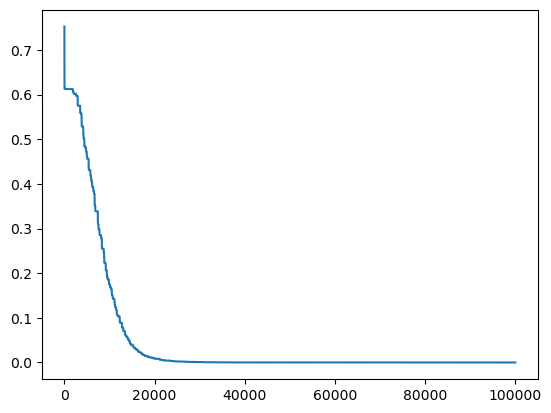

In [25]:
# Plotting blobs loss-iteration curve
plt.plot(range(i), np.array(losses_blobs).flatten());

In [26]:
y_hat_blobs_train, p_train = predict(x_train_blobs, W_blobs_hat, b_blobs_hat, 10)
print(f'Training Accuracy: {accuracy_score(Y_train_blobs, y_hat_blobs_train)*100:.2f}%')

y_hat_blobs_val, p_val = predict(x_val_blobs, W_blobs_hat, b_blobs_hat, 10)
print(f'Validation Accuracy: {accuracy_score(Y_val_blobs, y_hat_blobs_val)*100:.2f}%')

y_hat_blobs_test, p_test = predict(x_test_blobs, W_blobs_hat, b_blobs_hat, 10)
print(f'Testing Accuracy: {accuracy_score(Y_test_blobs, y_hat_blobs_test)*100:.2f}%')

Training Accuracy: 98.21%
Validation Accuracy: 98.33%
Testing Accuracy: 98.33%


### Visualising the wrong predictions

In [27]:
# Created a dataframe for wrong predictions
df_wrong = pd.DataFrame()

In [28]:
df_wrong["Y_actual"] = Y_test_blobs
df_wrong["y_hat"] = y_hat_blobs_test
df_wrong["y_hat_prob"] = p_test

In [29]:
df_wrong[df_wrong["Y_actual"]!=df_wrong["y_hat"]]

,Y_actual,y_hat,y_hat_prob
24,1,0,0.410347


### Circles

In [30]:
# Training Circles dataset
losses_circles, J_circles, W_circles_hat, b_circles_hat, i_c = train_Shallow_NN(x_train_circles, Y_train_circles, nodes = 10)

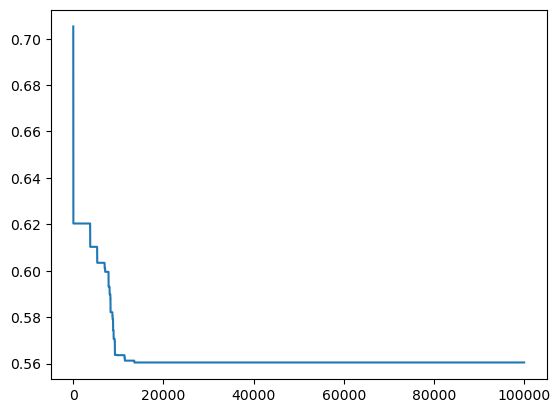

In [31]:
# plotting circles dataset
plt.plot(range(i_c), np.array(losses_circles).flatten());

In [32]:
y_hat_circles_train, p_train = predict(x_train_circles, W_circles_hat, b_circles_hat, 10)
print(f'Training Accuracy: {accuracy_score(Y_train_circles, y_hat_circles_train)*100:.2f}%')

y_hat_circles_val, p_val = predict(x_val_circles, W_circles_hat, b_circles_hat, 10)
print(f'Validation Accuracy: {accuracy_score(Y_val_circles, y_hat_circles_val)*100:.2f}%')

y_hat_circles_test, p_test = predict(x_test_circles, W_circles_hat, b_circles_hat, 10)
print(f'Testing Accuracy: {accuracy_score(Y_test_circles, y_hat_circles_test)*100:.2f}%')

Training Accuracy: 40.86%
Validation Accuracy: 30.67%
Testing Accuracy: 30.67%


In [33]:
df_wrong = pd.DataFrame()

In [34]:
df_wrong["Y_actual"] = Y_test_circles
df_wrong["y_hat"] = y_hat_circles_test
df_wrong["y_hat_prob"] = p_test

In [35]:
df_wrong[df_wrong["Y_actual"]!=df_wrong["y_hat"]].head()

,Y_actual,y_hat,y_hat_prob
0,0,1,0.504494
2,1,0,0.492325
3,1,0,0.475469
4,1,0,0.496027
5,1,0,0.493028


# Part 4: Challenging task (MNIST dataset)

### Functions source: Course module
* load_mnist ( ) : Allows to read the images dataset and returns images and labels
* visualise ( ) : Allows to view gray scale images of 28x28 size

In [36]:
def load_mnist(path, kind='train'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [37]:
def visualise(data, index):
    picture = data[index]
    picture.shape = (28,28) 
    plt.imshow(picture, cmap='gray')
    plt.show()

Using the provided functions, retrieving train and test images and labels

In [38]:
train_img, train_labels = load_mnist('', 'train')
test_img, test_labels = load_mnist('', 't10k')

In [39]:
# viewing shapes of training images and labels
print(train_labels.shape, train_img.shape)

(60000,) (60000, 784)


## Labels provided by the Professor : *Sneaker and Trouser*

In [40]:
label_names = ["Sneaker", "Trouser"]

# Created a function to find indexes of Sneaker and Trouser in the dataset
def indexer(data):
    # creating an array of labels with only label = 1 or 7, and 0 for any other label
    sneaker_trouser_label =  np.array([t if (t == 1 or t == 7) else 0 for t in data])
    
    # creating an array of indexes where the value is not 0
    index_label = np.where(sneaker_trouser_label !=0)[0]
    return index_label

In [41]:
# Got indexes for train and test data
train_indexes = indexer(train_labels)
test_indexes = indexer(test_labels)

### Visualising few images of test data

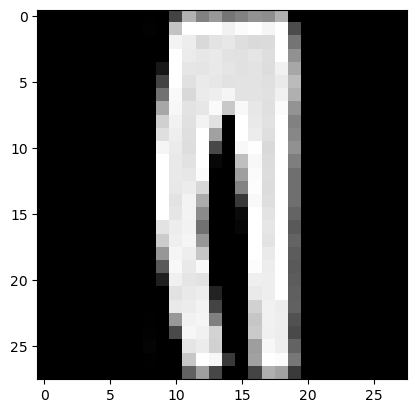

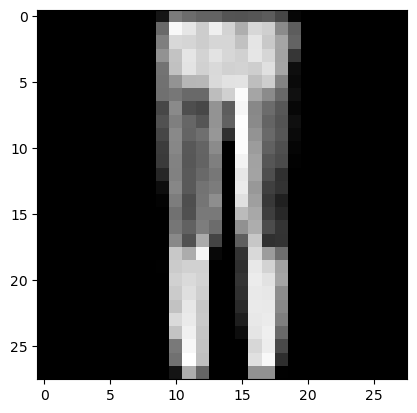

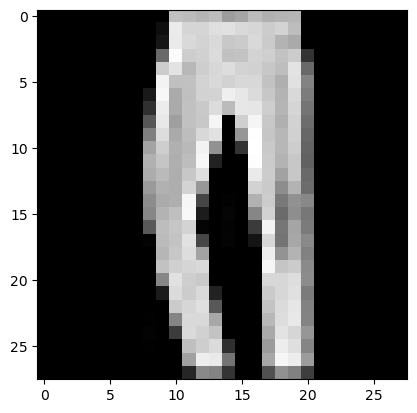

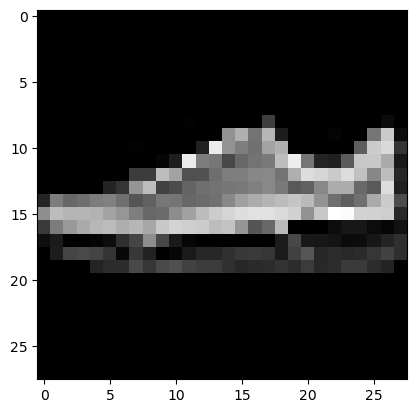

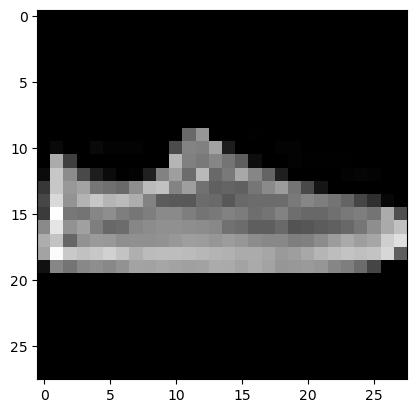

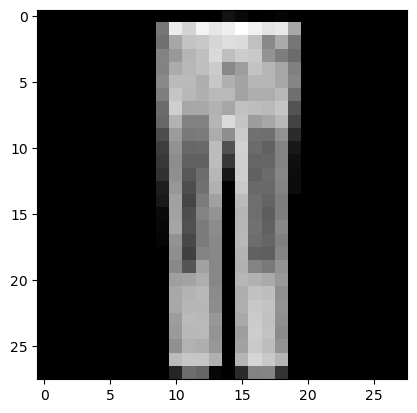

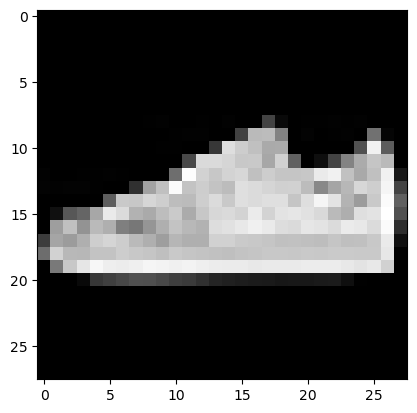

In [42]:
for i in test_indexes:
    visualise(test_img, i)
    if i>15:
        break

### From the indexes, created x and y for both train and test

In [43]:
# As pixels value goes to 255, hence normalising it with 255 to get all the values in 0 and 1
x_train_imgs = train_img[train_indexes]/255
y_train_labels = train_labels[train_indexes]
# labels are converted to 0 and 1, giving trouser-0 and sneaker-1
y_train_labels = [1 if l==1 else 0 for l in y_train_labels]

In [44]:
# As pixels value goes to 255, hence normalising it with 255 to get all the values in 0 and 1
x_test_imgs = test_img[test_indexes]/255
y_test_labels = test_labels[test_indexes]
# labels are converted to 0 and 1, giving trouser-0 and sneaker-1
y_test_labels = [1 if l==1 else 0 for l in y_test_labels]

## Evaluating the dataset

#### Training the shallow NN model with nodes = 20 and alpha = 0.0001

In [45]:
losses_imgs, J_imgs, W_imgs_hat, b_imgs_hat, i_imgs = train_Shallow_NN (x_train_imgs, y_train_labels, nodes = 30, alpha =0.0001)

#### Plotting the loss-iteration curve

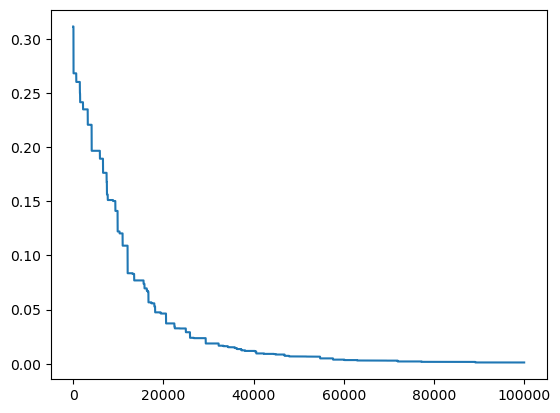

In [46]:
plt.plot(range(i_imgs), np.array(losses_imgs).flatten())

In [47]:
y_hat_imgs_train, p_train = predict(x_train_imgs, W_imgs_hat, b_imgs_hat, 30)
print(f'Training Accuracy: {accuracy_score(y_train_labels, y_hat_imgs_train)*100:.2f}%')

y_hat_imgs_test, p_test = predict(x_test_imgs, W_imgs_hat, b_imgs_hat, 30)
print(f'Testing Accuracy: {accuracy_score(y_test_labels, y_hat_imgs_test)*100:.2f}%')

Training Accuracy: 99.95%
Testing Accuracy: 99.90%


### Results

* We can see that the accuracy score for Training and Testing data is high.
* As we increase the number of hidden_nodes, the accuracy increases to a limit and then there is no significant change observed.
* Decreasing the learning rate (alpha), the convergence takes more iterations. 
* Also the SD we used for Weights ans biases (0.01) while initialising can be increased to take bigger steps per iteration

## Part 5: Enhancement task

Few code enhancements done are:
* Code enhancements makes the model faster to train and predict
* Optimising code by creating a class and defining all the function inside it. Self interactions within the class reduces the redundancies in the code. 
* plot function is also defined within the class, needs no argument to plot the loss-iterations cure.
* Predict can also be used to predict the estimated classes (y_hat_approximate), does not have to provide updated W or B.
* As plot and predict are inside the class, now train function does not need to return any value.

**Decaying alpha**

* Decay has been added to alpha as to reduce learning rate after number of iterations to not cross the global optima.
* Approach of simmulated annealing has been added to the learning rate.


In [48]:
class Enhanced_NN():
    
    def __init__(self, nodes =4, alpha = 0.1, max_iterations = 50000, threshold = 1e-8, decay = 0.999):
        
        # Initiating parameters. All the parameters have a default value, hence class can be called without arguments
        self.hidden_layer = [nodes, 1]
        self.alpha = alpha
        self.decay = decay
        self.max_iterations = max_iterations
        self.threshold = threshold
    
    
    def sigmoid(self, z, output_layer = False):
    
        # for hidden layer
        if output_layer == False:    
            return 1/(1+np.exp(-z))
        else:
            # for output layer
            return sigmoid(z)*(1-sigmoid(z))
    
    def forward_prop(self, x):    
    
        # initialising a_layer with the input instance
        self.a_layer = [x]
        # for Input layer, Z is initialised as x
        self.Z = x
        
        for layer in range(self.hidden_layer[1]+1):
            
            self.Z = self.b[layer] + np.dot(self.Z, self.W[layer].T)
            self.a_layer.append(self.sigmoid(self.Z))

    
    def loss_func(self):    
    
        self.Y = np.array(self.true_y)
        self.y_hat = np.array(self.a_layer[-1])

        self.J = -(self.Y*np.log(self.y_hat)+(1-self.Y)*np.log(1-self.y_hat))
        return self.J
    
    def back_prop(self):   
        
        # Initialising dW and db
    
        self.dW = [np.zeros((layer.shape)) for layer in self.W]
        self.db = [np.zeros((layer.shape)) for layer in self.b]

        self.dZ_nodes = [0 for _ in range(self.hidden_layer[0])]

        for layer in range(-1, -self.hidden_layer[1]-2, -1):
            # For output layer
            if layer == -1:

                self.dZ = self.a_layer[layer].T - np.array(self.true_y)   
                self.dW[layer] = np.dot(self.dZ , self.a_layer[layer-1])
                self.db[layer] = np.sum(self.dZ)
                self.dZ_nodes[layer] = self.dZ
            #for hidden layer
            else:

                self.dZ = np.dot(self.dZ_nodes[1+layer].T,  self.W[1+layer]) * self.sigmoid(self.a_layer[layer],output_layer = True)
                self.dW[layer] = (self.dZ.T * self.a_layer[layer-1])
                self.db[layer] = np.sum(self.dZ)
                self.dZ_nodes[layer] = self.dZ

    
    def train(self, x, Y):
        
        
        self.x = x
        self.Y = Y
        
        # Initialising weights and bias with mean =0 and std = 0.01
        self.W = []
        self.b = []
        # Hidden layer
        self.W.append(np.random.normal(loc=0.0, scale=0.01, size = (self.hidden_layer[0], self.x.shape[1])))
        self.b.append(np.random.normal(loc=0.0, scale=0.01, size = (1, self.hidden_layer[0])))
        # output layer
        self.W.append(np.random.normal(loc=0.0, scale=0.01, size = (self.hidden_layer[1], self.hidden_layer[0])))
        self.b.append(np.random.normal(loc=0.0, scale=0.01, size = (1,1)))

        # Initialising cost function to high cost
        self.losses=[]
        self.J = 1000
        self.J_previous = 1000
        self.iterations=0

        # initialising stop flag to false
        self.stop = False
        while self.stop==False:
            
            # choosing random index
            random_loc = np.random.choice(len(self.x))
            
            # randomly finding x and y instance to train
            self.training_case = x[random_loc]
            self.true_y = Y[random_loc]
            

            self.forward_prop(self.training_case)

            self.y_hat = self.a_layer[-1] # output of last layer

            self.J = self.loss_func()

            self.back_prop()

            # updating weights
            for j in range(len(self.W)):
                self.W[j] -= self.alpha * self.dW[j]
                self.b[j] -= self.alpha * self.db[j]

                
            self.iterations+=1
            
            # checking convergence
            if abs(self.J - self.J_previous) < self.threshold:
                self.stop = True
                
            # checking iterations limit
            elif self.iterations==self.max_iterations:
                self.stop = True

            # Hill climb approach
            if abs(self.J)< abs(self.J_previous):

                self.losses.append(self.J)
                self.J_previous = self.J
            else:
                self.losses.append(self.J_previous)
            
            # Simulated Annealing Approach (decay to alpha)
            self.alpha *= self.decay

    
    def predict(self, x_predict):
        self.forward_prop(x_predict)
        return np.array([1 if y>=0.5 else 0 for y in self.a_layer[-1]])

    def plot(self):
        plt.plot(range(self.iterations), np.array(self.losses).flatten())
        plt.show()


## Evaluation on MNIST Dataset

In [49]:
model = Enhanced_NN(nodes = 10)

In [50]:
model.train(x_train_imgs, y_train_labels)

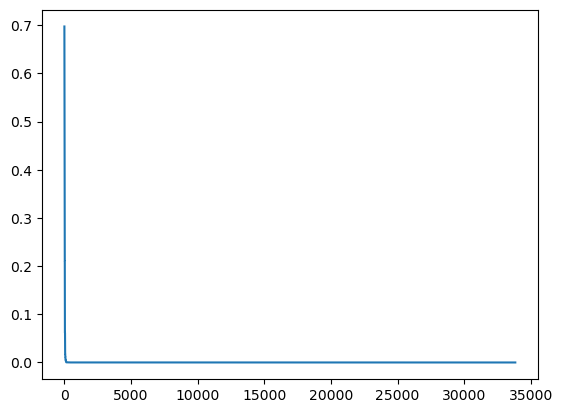

In [51]:
model.plot()

In [52]:
y_hat_enc_train = model.predict(x_train_imgs)
y_hat_enc = model.predict(x_test_imgs)

In [53]:
print(f'Accuracy of MNIST train data: {accuracy_score(y_train_labels, y_hat_enc_train)*100:.2f}%')
print(f'Accuracy of MNIST test data: {accuracy_score(y_test_labels, y_hat_enc)*100:.2f}%')

Accuracy of MNIST train data: 99.96%
Accuracy of MNIST test data: 99.90%


# Conclusion

This assignment can be concluded in following points:

* Started with No hidden layer logistic regression neural network, with stochastic gradient descent, where took 1 instance at a time. Calculated the Cost function and optimised the weights and bias to reduce it.
* Evaluated 2 small databases Circles and Blobs using the created no hidden layer logistic ression NN. Found out that Blobs were linearly separable with a high accuracy score and Circles are linearly not separable with low accuracy.
* Then updated the NN by adding 1 hidden layer to it. Updated all the functions accordingly. Used Numpy for matrix calculations. Wwe computed the small datasets again, this time circles performed better than the no hidden layer NN.
* From the code given by the professor, downloaded the dataset for images of **Skeaker and Trouser**. Normalised the images data and evaluated using shallow NN created above.
* Then by createing class for the neural network, added functionalities like train, predict and plot to the class itself. Added a decay factor to the learning rate so as to not cross the global optima after some iterations.

<hr>